In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from pylab import savefig

In [2]:
q4 = pd.read_csv('final.csv')
q4.head(3)

,Unnamed: 0,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,http://www.billboard.com/charts/hot-100/2014-0...,2014-01-04,10,Story Of My Life,One Direction,Story Of My LifeOne Direction,1,10.0,6,...,3.0,-5.802,1.0,0.0477,0.225,0.0,0.119,0.286,121.07,4.0
1,1,http://www.billboard.com/charts/hot-100/2014-0...,2014-02-01,9,Story Of My Life,One Direction,Story Of My LifeOne Direction,1,10.0,6,...,3.0,-5.802,1.0,0.0477,0.225,0.0,0.119,0.286,121.07,4.0
2,2,http://www.billboard.com/charts/hot-100/2014-0...,2014-02-08,12,Story Of My Life,One Direction,Story Of My LifeOne Direction,1,9.0,6,...,3.0,-5.802,1.0,0.0477,0.225,0.0,0.119,0.286,121.07,4.0


In [3]:
q4['year'] = pd.DatetimeIndex(q4['WeekID']).year
q4['month'] = pd.DatetimeIndex(q4['WeekID']).month
 

In [4]:
q44 = q4[(q4['year'] ==2019)]
q44 

,Unnamed: 0,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month
211,211,https://www.billboard.com/charts/hot-100/2019-...,2019-05-04,40,Boy With Luv,BTS Featuring Halsey,Boy With LuvBTS Featuring Halsey,1,8.0,8,...,0.0,0.0965,0.0923,0.0,0.1920,0.798,119.991,4.0,2019,5
212,212,https://www.billboard.com/charts/hot-100/2019-...,2019-05-11,40,Boy With Luv,BTS Featuring Halsey,Boy With LuvBTS Featuring Halsey,1,40.0,8,...,0.0,0.0965,0.0923,0.0,0.1920,0.798,119.991,4.0,2019,5
213,213,https://www.billboard.com/charts/hot-100/2019-...,2019-06-15,90,Boy With Luv,BTS Featuring Halsey,Boy With LuvBTS Featuring Halsey,1,81.0,8,...,0.0,0.0965,0.0923,0.0,0.1920,0.798,119.991,4.0,2019,6
214,214,https://www.billboard.com/charts/hot-100/2019-...,2019-06-01,71,Boy With Luv,BTS Featuring Halsey,Boy With LuvBTS Featuring Halsey,1,61.0,8,...,0.0,0.0965,0.0923,0.0,0.1920,0.798,119.991,4.0,2019,6
215,215,https://www.billboard.com/charts/hot-100/2019-...,2019-05-25,61,Boy With Luv,BTS Featuring Halsey,Boy With LuvBTS Featuring Halsey,1,51.0,8,...,0.0,0.0965,0.0923,0.0,0.1920,0.798,119.991,4.0,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137431,137431,https://www.billboard.com/charts/hot-100/2019-...,2019-03-16,28,ZEZE,Kodak Black Featuring Travis Scott & Offset,ZEZEKodak Black Featuring Travis Scott & Offset,1,25.0,2,...,0.0,0.1760,0.0521,0.0,0.0924,0.504,98.043,4.0,2019,3
137432,137432,https://www.billboard.com/charts/hot-100/2019-...,2019-03-23,29,ZEZE,Kodak Black Featuring Travis Scott & Offset,ZEZEKodak Black Featuring Travis Scott & Offset,1,28.0,2,...,0.0,0.1760,0.0521,0.0,0.0924,0.504,98.043,4.0,2019,3
137433,137433,https://www.billboard.com/charts/hot-100/2019-...,2019-03-30,31,ZEZE,Kodak Black Featuring Travis Scott & Offset,ZEZEKodak Black Featuring Travis Scott & Offset,1,29.0,2,...,0.0,0.1760,0.0521,0.0,0.0924,0.504,98.043,4.0,2019,3
137434,137434,https://www.billboard.com/charts/hot-100/2019-...,2019-04-06,38,ZEZE,Kodak Black Featuring Travis Scott & Offset,ZEZEKodak Black Featuring Travis Scott & Offset,1,31.0,2,...,0.0,0.1760,0.0521,0.0,0.0924,0.504,98.043,4.0,2019,4


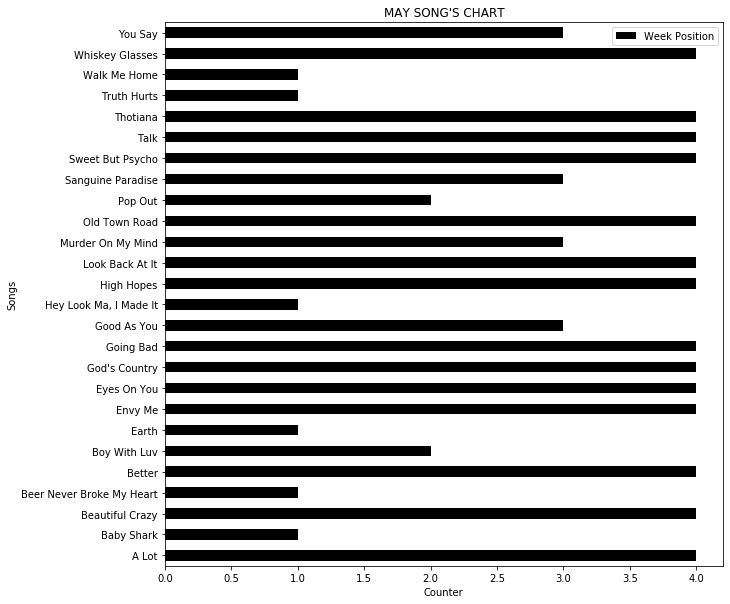

In [5]:
d = q44[(q44['month'] ==5)]
#d=q44.drop(['Unnamed: 0','Unnamed: 0.1','url','spotify_track_popularity','spotify_track_album','artist_genre','loudness','tempo','Peak Position','spotify_genre','spotify_track_id','spotify_track_preview_url','spotify_track_duration_ms','spotify_track_explicit','danceability','energy','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','time_signature'],axis=1)

wpm=d[(d['Week Position'] <=50)]
wpm = wpm[['Week Position','Song']]
MMonth = wpm.groupby(wpm['Song']).count()
MMonth.plot(kind="barh",title="MAY SONG'S CHART",figsize=(10,10),color='bLACK')
plt.ylabel('Songs')
plt.xlabel('Counter')
plt.show()

Text(0, 0.5, 'Songs')

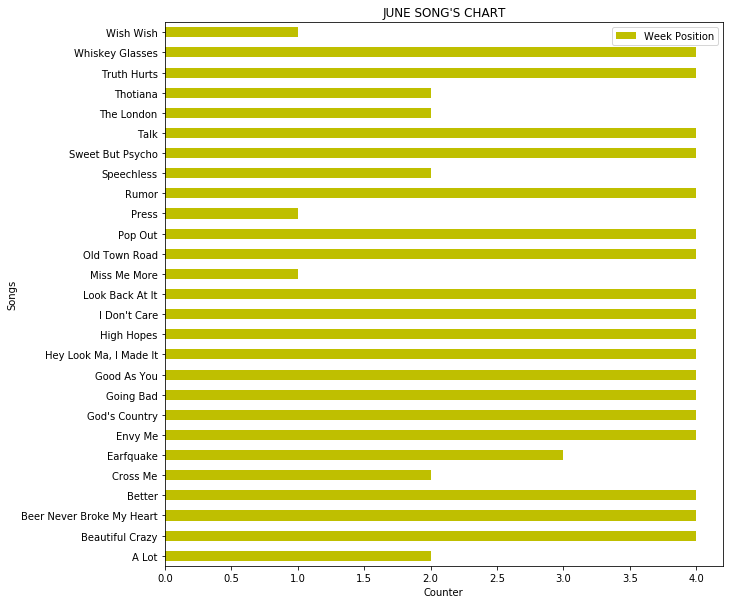

In [6]:
d1 = q44[(q44['month'] ==6)]
#d1=q44.drop(['Unnamed: 0','Unnamed: 0.1','url','spotify_track_popularity','spotify_track_album','artist_genre','loudness','tempo','Peak Position','spotify_genre','spotify_track_id','spotify_track_preview_url','spotify_track_duration_ms','spotify_track_explicit','danceability','energy','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','time_signature'],axis=1)
#d1
wpj=d1[(d1['Week Position'] <=50)]
wpj = wpj[['Week Position','Song']]
JMonth = wpj.groupby(wpj['Song']).count()
JMonth.plot(kind="barh",title="JUNE SONG'S CHART",figsize=(10,10),color ='y')
plt.xlabel('Counter')
plt.ylabel('Songs')